In [25]:
import numpy as np

In [26]:
!wget -O housing_data.csv https://docs.google.com/spreadsheets/d/1au3HI9TCGs8dy_YIpGVPJizmI_-eeyXB0jdVcGCEXss/export?format=csv

--2025-12-09 07:58:26--  https://docs.google.com/spreadsheets/d/1au3HI9TCGs8dy_YIpGVPJizmI_-eeyXB0jdVcGCEXss/export?format=csv
Resolving docs.google.com (docs.google.com)... 74.125.201.138, 74.125.201.139, 74.125.201.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.201.138|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0g-88-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/8d3gdnn54ujemdu3ritsoire5s/1765267105000/101951693283634981502/*/1au3HI9TCGs8dy_YIpGVPJizmI_-eeyXB0jdVcGCEXss?format=csv [following]
--2025-12-09 07:58:26--  https://doc-0g-88-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/8d3gdnn54ujemdu3ritsoire5s/1765267105000/101951693283634981502/*/1au3HI9TCGs8dy_YIpGVPJizmI_-eeyXB0jdVcGCEXss?format=csv
Resolving doc-0g-88-sheets.googleusercontent.com (doc-0g-88-sheets.googleusercontent.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to doc-0g-88-sheets.googleuserconte

In [27]:
filename = "housing_data.csv"
x_values =[]
y_values = []

In [28]:
with open(filename, 'r') as f:
  lines = f.readlines() #skip header
  for line in lines[1:]:
    if line.strip():
      parts=line.strip().split(',')
      x_values.append(float(parts[0]))
      y_values.append(float(parts[1]))

In [29]:
x_values[0]

1100.0

In [30]:
y_values[0]

199000.0

In [31]:
def gradient_descent(x, y, learning_rate=0.01, epochs=2000):
  x=np.array(x)
  y=np.array(y)
  n=len(x)

  m=0
  c=0

  for i in range(epochs):
    y_pred =m*x+c

    error=y_pred-y
    GD_m=(1/n)*np.sum(error*x)
    GD_c= (1/n)*np.sum(error)

    m=m-learning_rate*GD_m
    c=c-learning_rate*GD_c

  return m, c

In [32]:
x_arr= np.array(x_values)
y_arr= np.array(y_values)

x_mean= np.mean(x_arr)
x_std= np.std(x_arr)
y_mean= np.mean(y_arr)
y_std=np.std(y_arr)

x_scaled= (x_arr-x_mean)/x_std  #normalisation
y_scaled= (y_arr-y_mean)/y_std

m_scaled, c_scaled= gradient_descent(x_scaled, y_scaled, learning_rate=0.1, epochs=2000)

m= (y_std*m_scaled)/x_std  #de-normalisation
c= (y_std*c_scaled)+y_mean-(m*x_mean)

print("Slope (m):", m)
print("Intercept (c):", c)

Slope (m): 171.17327329376172
Intercept (c): 1627.368038025219


In [33]:
print(f"Equation of best fit line (Gradient Descent): y = {m:.2f}x + {c:.2f}")

Equation of best fit line (Gradient Descent): y = 171.17x + 1627.37


In [34]:
def pred_func(value):
  return (m*value) + c

In [35]:
sqft=2500
pred_price = pred_func(sqft)
print(f"Predicted price for {sqft} sq ft: {pred_price:.2f}")

Predicted price for 2500 sq ft: 429560.55


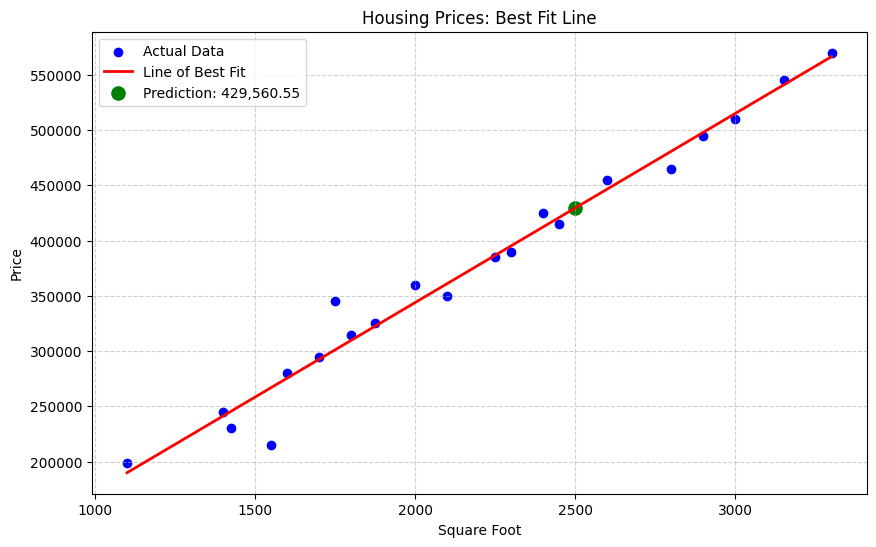

In [36]:
import matplotlib.pyplot as plt

x_line=[min(x_values), max(x_values)]
y_line=[m*x+c for x in x_line]

plt.figure(figsize=(10, 6))

plt.scatter(x_values, y_values, color='blue', label='Actual Data')

plt.plot(x_line, y_line, color='red', linewidth=2, label='Line of Best Fit')

pred_x = 2500
pred_y = m * 2500 + c
plt.scatter([pred_x], [pred_y], color='green', s=90, label=f'Prediction: {pred_y:,.2f}')

plt.title('Housing Prices: Best Fit Line')
plt.xlabel('Square Foot')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
